## Import Libraries 

In [147]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

#### Read Files

In [148]:
landuse_gdf = gpd.read_file('../data/raw/landuse_df.gpkg')
natural_gdf = gpd.read_file('../data/raw/natural_df.gpkg')
pofw_gdf = gpd.read_file('../data/raw/pofw_df.gpkg')
pois_gdf = gpd.read_file('../data/raw/pois_df.gpkg')
roads_gdf = gpd.read_file('../data/raw/roads_df.gpkg')

all_properties = pd.read_csv('../data/curated/all_properties_merged.csv')
urban_landmarks = pd.read_csv('../data/raw/urban_landmarks_features.csv')

In [149]:
all_properties.head()

suburb  year  dec_median  jun_median  mar_median  sep_median  \
0  abbotsford  2016       450.0       450.0       450.0       450.0   
1  abbotsford  2016       450.0       450.0       450.0       450.0   
2  abbotsford  2016       450.0       450.0       450.0       450.0   
3  abbotsford  2016       450.0       450.0       450.0       450.0   
4  abbotsford  2016       450.0       450.0       450.0       450.0   

   offence_division  total_offence_count  hi_1_149_tot  hi_150_299_tot  ...  \
0               1.0                107.0          27.0            72.0  ...   
1               5.0                 49.0          27.0            72.0  ...   
2               3.0                 76.0          27.0            72.0  ...   
3               6.0                  0.0          27.0            72.0  ...   
4               2.0               1065.0          27.0            72.0  ...   

   distance_to_restaurant  distance_to_supermarket  \
0                1.141601                 1.083238   
1                1.141601                 1.083238   
2                1.141601                 1.083238   
3                1.141601                 1.083238   
4                1.141601                 1.083238   

   nearest_transport_avg_distance  distance_to_cbd  median_bath  \
0                            1.11             5.55            1   
1                            1.11             5.55            1   
2                            1.11             5.55            1   
3                            1.11             5.55            1   
4                            1.11             5.55            1   

   median_parkings  furnished_count  unfurnished_count  pets_allowed  \
0                1                5                 54            11   
1                1                5                 54            11   
2                1                5                 54            11   
3                1                5                 54            11   
4                1                5                 54            11   

   pets_not_allowed  
0                48  
1                48  
2                48  
3                48  
4                48  

[5 rows x 83 columns]

-----

## Visualisations

#### Map Visualisations

Landuse

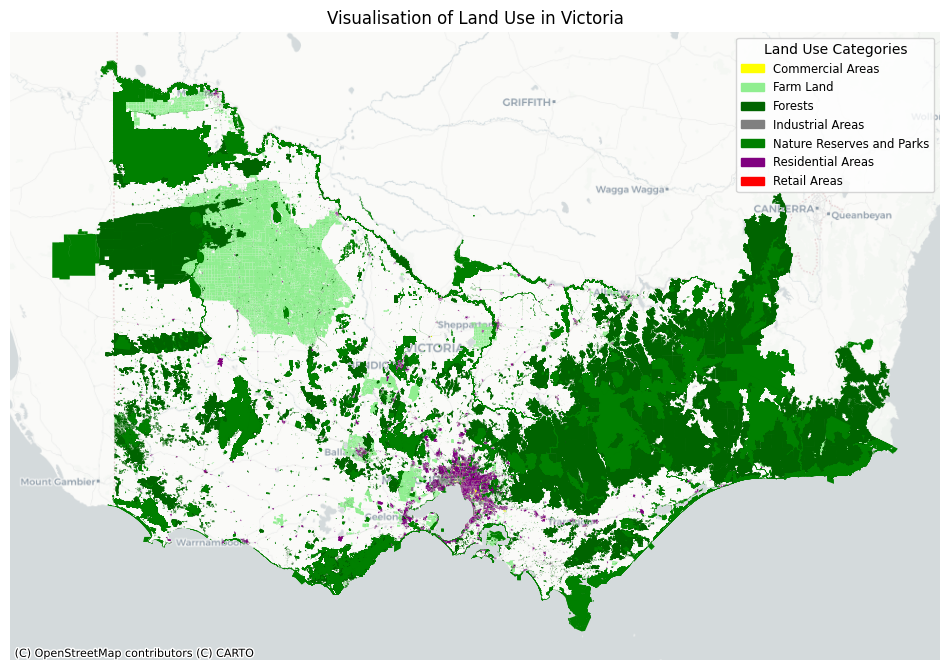

In [150]:
# Define the list of feature_class features to include
include_features = ['park', 'forest', 'industrial_areas', 'retail_areas',
       'residential_areas', 'nature_reserve', 'commercial_areas',
       'farmland']

# Filter the GeoDataFrame to include only the specified features
filtered_gdf = landuse_gdf[landuse_gdf['feature_class'].isin(include_features)]

# Replace feature_class values with new combined labels
filtered_gdf['feature_class_combined'] = filtered_gdf['feature_class'].replace({
    'commercial_areas': 'Commercial Areas',
    'farmland': 'Farm Land',
    'forest': 'Forests',
    'industrial_areas': 'Industrial Areas',
    'nature_reserve': 'Nature Reserves and Parks',
    'park': 'Nature Reserves and Parks',
    'residential_areas': 'Residential Areas',
    'retail_areas': 'Retail Areas'
})

# Define a color mapping for the specified combined feature_class features
color_mapping = {
    'Commercial Areas': 'yellow',
    'Farm Land': 'lightgreen',
    'Forests': '#006400',
    'Industrial Areas': 'grey',
    'Nature Reserves and Parks': 'green',
    'Residential Areas': 'purple',
    'Retail Areas': 'red'
}

# Create a color column based on the combined feature class
filtered_gdf['color'] = filtered_gdf['feature_class_combined'].map(color_mapping)

# Convert the CRS to Web Mercator for compatibility with contextily basemaps
filtered_gdf = filtered_gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all geometries at once with the corresponding colors
filtered_gdf.plot(ax=ax, color=filtered_gdf['color'], legend=True)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Create a custom legend by adding patches
import matplotlib.patches as mpatches

# Manually create legend patches
legend_patches = [mpatches.Patch(color=color, label=feature_class) for feature_class, color in color_mapping.items()]
# Adjusting the size of the legend by specifying fontsize
plt.legend(handles=legend_patches, title='Land Use Categories', loc='upper right', fontsize='small')


# Add title and hide the axis
plt.title('Visualisation of Land Use in Victoria', fontsize='large')
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()


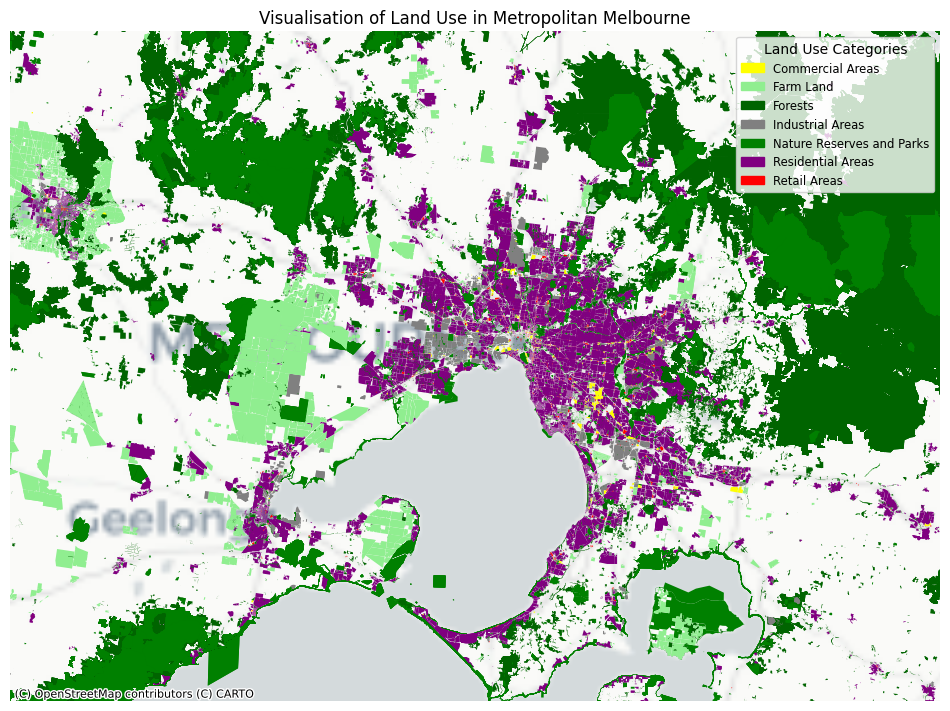

In [151]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all geometries at once with the corresponding colors
filtered_gdf.plot(ax=ax, color=filtered_gdf['color'], legend=True)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Set the axis limits to zoom into the specified region
# 1.61e7 to 1.62e7 on the x-axis and around -4.5e6 on the y-axis
ax.set_xlim([1.60e7, 1.625e7])  # x-axis limits
ax.set_ylim([-4.65e6, -4.47e6])  # y-axis limits

# Create a custom legend by adding patches
import matplotlib.patches as mpatches

# Manually create legend patches
legend_patches = [mpatches.Patch(color=color, label=feature_class) for feature_class, color in color_mapping.items()]
plt.legend(handles=legend_patches, title='Land Use Categories', loc='upper right', fontsize='small')

# Add title and hide the axis
plt.title('Visualisation of Land Use in Metropolitan Melbourne', fontsize='large')
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()

Places of Worship

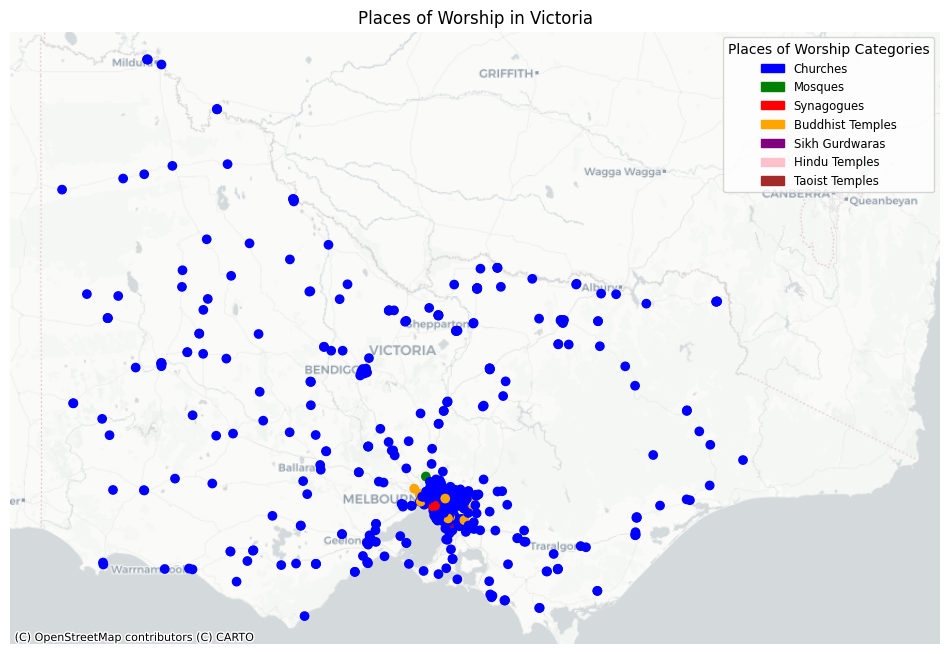

In [152]:
# Dictionary of categories of places of worship
pofw_categories = {
    "churches": ['christian', 'christian_anglican', 'christian_catholic', 
                 'christian_lutheran', 'christian_orthodox', 'christian_evangelical', 
                 'christian_protestant', 'christian_methodist'],
    "mosques": ['muslim', 'muslim_sunni', 'muslim_shia'],
    "synagogues": ['jewish'],
    "buddhist_temples": ['buddhist'],
    "sikh_gurdwaras": ['sikh'],
    "hindu_temples": ['hindu'],
    "taoist_temples": ['taoist']
}

# Create a reverse mapping from feature_class to pofw_category
feature_to_pofw = {}
for category, features in pofw_categories.items():
    for feature in features:
        feature_to_pofw[feature] = category

# Map the feature_class to their respective pofw_category
pofw_gdf['pofw_category'] = pofw_gdf['feature_class'].map(feature_to_pofw)

# Filter out rows where pofw_category is not set
filtered_pofw_gdf = pofw_gdf.dropna(subset=['pofw_category'])

# Define a color mapping for each pofw_category
color_mapping = {
    'Churches': 'blue',
    'Mosques': 'green',
    'Synagogues': 'red',
    'Buddhist Temples': 'orange',
    'Sikh Gurdwaras': 'purple',
    'Hindu Temples': 'pink',
    'Taoist Temples': 'brown'
}

# You can apply a transformation to capitalize and replace underscores in the 'pofw_category' column
filtered_pofw_gdf['pofw_category'] = filtered_pofw_gdf['pofw_category'].apply(lambda x: x.replace('_', ' ').title())

# Create a color column based on the pofw_category
filtered_pofw_gdf['color'] = filtered_pofw_gdf['pofw_category'].map(color_mapping)

# Convert the CRS to Web Mercator for compatibility with contextily basemaps
filtered_pofw_gdf = filtered_pofw_gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all geometries at once with the corresponding colors
filtered_pofw_gdf.plot(ax=ax, color=filtered_pofw_gdf['color'], legend=True)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Create a custom legend by adding patches
import matplotlib.patches as mpatches

# Manually create legend patches
legend_patches = [mpatches.Patch(color=color, label=pofw) for pofw, color in color_mapping.items()]
plt.legend(handles=legend_patches, title='Places of Worship Categories', loc='upper right', fontsize='small')

# Add title and hide the axis
plt.title('Places of Worship in Victoria', fontsize='large')
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()

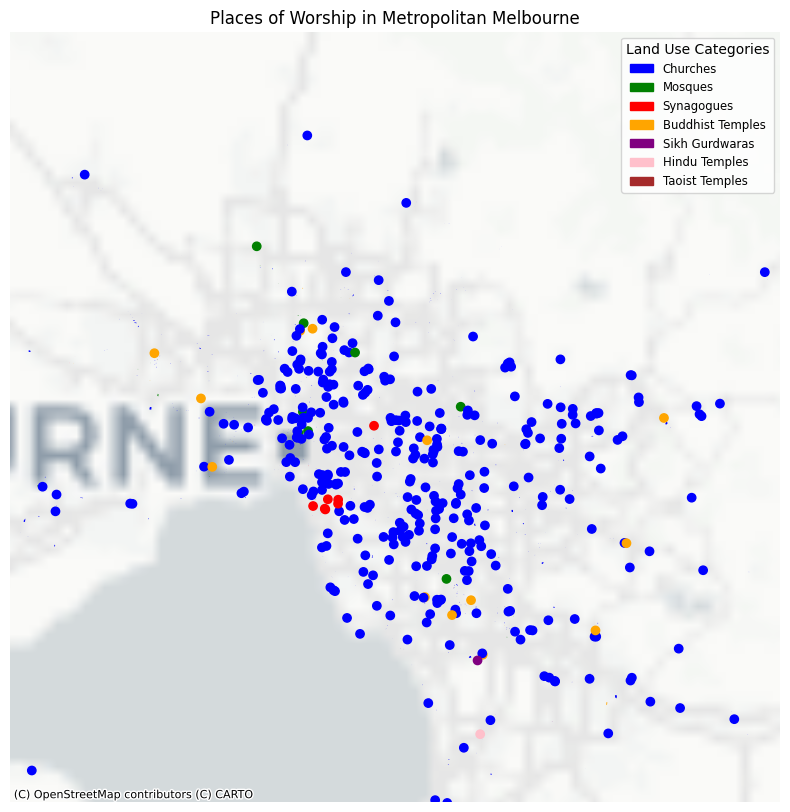

In [153]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all geometries at once with the corresponding colors
filtered_pofw_gdf.plot(ax=ax, color=filtered_pofw_gdf['color'], legend=True)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Set the axis limits to zoom into the specified region
# Adjust x and y limits to zoom in around Metropolitan Melbourne
ax.set_xlim([1.61e7, 1.62e7])  # x-axis limits (Web Mercator)
ax.set_ylim([-4.6e6, -4.5e6])  # y-axis limits (Web Mercator)

# Create a custom legend by adding patches
legend_patches = [mpatches.Patch(color=color, label=feature_class) for feature_class, color in color_mapping.items()]
plt.legend(handles=legend_patches, title='Land Use Categories', loc='upper right', fontsize='small')

# Add title and hide the axis
plt.title('Places of Worship in Metropolitan Melbourne', fontsize='large')
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()

#### Histograms

/var/folders/03/crp2bz8918l1tgr0vbt4jgfh0000gn/T/ipykernel_34081/990841026.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_suburbs_per_category = category_counts.groupby('categories').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


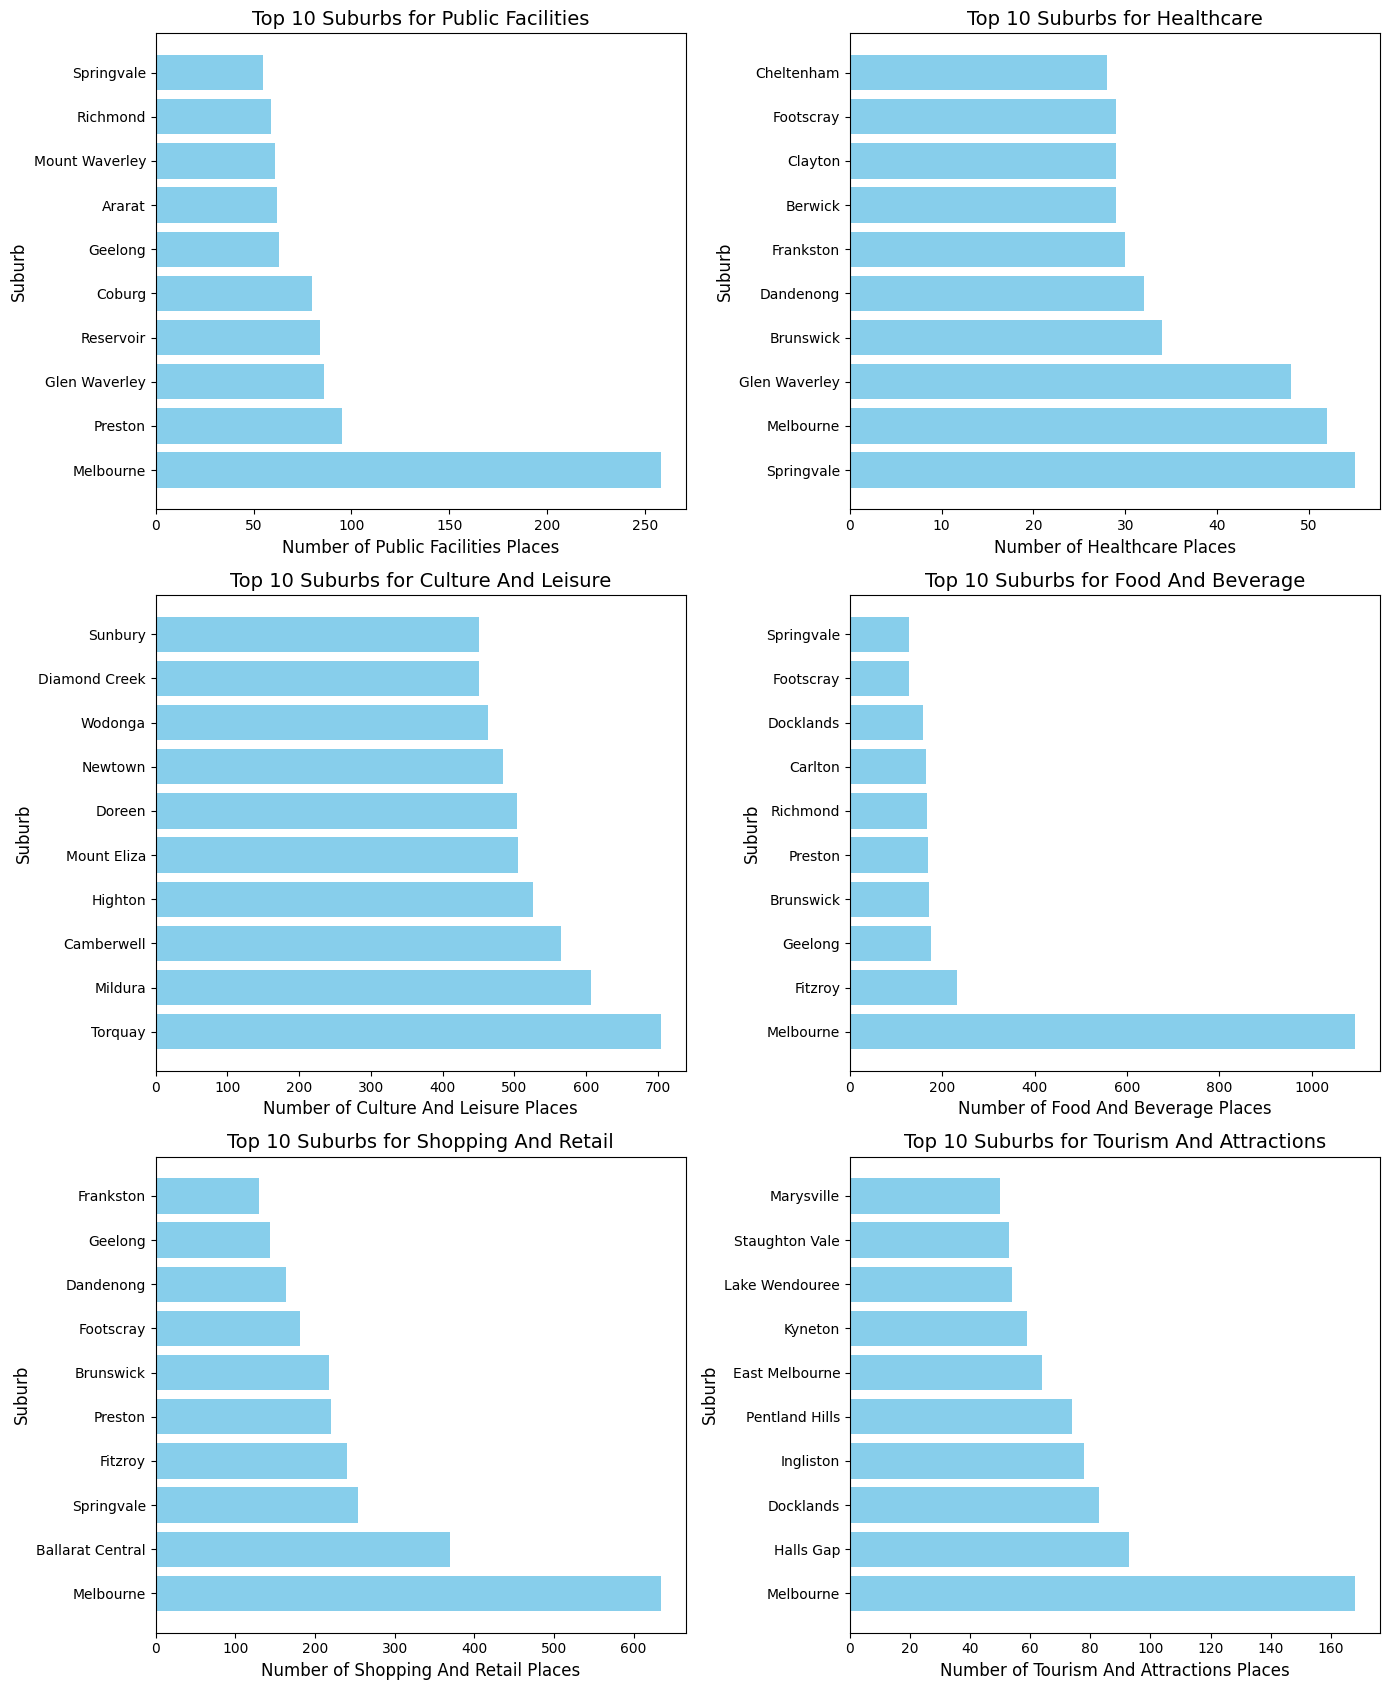

In [154]:
# Define the categories of interest
categories_of_interest = ['public_facilities', 'healthcare', 'culture_and_leisure', 
                          'food_and_beverage', 'shopping_and_retail', 
                          'tourism_and_attractions']

# Group the data by 'gazetted_locality' (suburb) and 'categories', then count occurrences
category_counts = pois_gdf[pois_gdf['categories'].isin(categories_of_interest)] \
    .groupby(['gazetted_locality', 'categories']) \
    .size() \
    .reset_index(name='count')

# For each category, find the top 10 suburbs with the highest counts
top_suburbs_per_category = category_counts.groupby('categories').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Plot the histogram for each category in a 2x3 grid (2 columns, 3 rows)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots

# Flatten the axs array to easily iterate over it
axs = axs.flatten()

for i, category in enumerate(categories_of_interest):
    # Get data for the current category
    data = top_suburbs_per_category[top_suburbs_per_category['categories'] == category]
    
    # Plot histogram with capitalized y-axis labels
    axs[i].barh(data['gazetted_locality'].apply(lambda x: x.title()), data['count'], color='skyblue')
    axs[i].set_title(f'Top 10 Suburbs for {category.replace("_", " ").title()}', fontsize=14)
    axs[i].set_xlabel(f'Number of {category.replace("_", " ").title()} Places', fontsize=12)
    axs[i].set_ylabel('Suburb', fontsize=12)

# Remove any unused subplots
for j in range(len(categories_of_interest), len(axs)):
    fig.delaxes(axs[j])

# Show the plot
plt.tight_layout()
plt.show()

---

### Correlation Analysis & Viusalisations

In [155]:
# Step 1: Retain specific columns from all_properties
columns_to_retain = ['year', 'dec_median', 'jun_median', 'mar_median', 'sep_median']

# Step 2: Get all columns from urban_landmarks except 'gazetted_locality' 
# that are also present in all_properties
columns_to_keep = urban_landmarks.columns.difference(['gazetted_locality']).intersection(all_properties.columns)

# Step 3: Combine the columns to retain and the columns from urban_landmarks
combined_columns = list(columns_to_retain) + list(columns_to_keep)

# Step 4: Filter all_properties to retain only these combined columns
filtered_all_properties = all_properties[combined_columns]

# Display the first few rows of the final filtered data
filtered_all_properties.head()


year  dec_median  jun_median  mar_median  sep_median  accommodation  beach  \
0  2016       450.0       450.0       450.0       450.0            4.0    1.0   
1  2016       450.0       450.0       450.0       450.0            4.0    1.0   
2  2016       450.0       450.0       450.0       450.0            4.0    1.0   
3  2016       450.0       450.0       450.0       450.0            4.0    1.0   
4  2016       450.0       450.0       450.0       450.0            4.0    1.0   

   cliff  commercial_areas  culture_and_leisure  ...  public_facilities  \
0    0.0              17.0                 31.0  ...               25.0   
1    0.0              17.0                 31.0  ...               25.0   
2    0.0              17.0                 31.0  ...               25.0   
3    0.0              17.0                 31.0  ...               25.0   
4    0.0              17.0                 31.0  ...               25.0   

   residential_areas  residential_roads  retail_areas  roads_mode  \
0               53.0              100.0          10.0           6   
1               53.0              100.0          10.0           6   
2               53.0              100.0          10.0           6   
3               53.0              100.0          10.0           6   
4               53.0              100.0          10.0           6   

   shopping_and_retail  spring  tourism_and_attractions  track  walking_paths  
0                 64.0     0.0                     18.0    3.0          165.0  
1                 64.0     0.0                     18.0    3.0          165.0  
2                 64.0     0.0                     18.0    3.0          165.0  
3                 64.0     0.0                     18.0    3.0          165.0  
4                 64.0     0.0                     18.0    3.0          165.0  

[5 rows x 47 columns]

In [156]:
# Create a correlation matrix for filtered_all_properties
correlation_matrix = filtered_all_properties.corr()

# Display the correlation matrix
correlation_matrix

year  dec_median  jun_median  mar_median  \
year                      1.000000e+00    0.465496    0.441403    0.428690   
dec_median                4.654956e-01    1.000000    0.987061    0.975399   
jun_median                4.414032e-01    0.987061    1.000000    0.995855   
mar_median                4.286904e-01    0.975399    0.995855    1.000000   
sep_median                4.974690e-01    0.951614    0.959927    0.955860   
accommodation            -7.320323e-14   -0.145648   -0.145893   -0.147928   
beach                    -3.307955e-14    0.239728    0.240361    0.237587   
cliff                     2.203321e-14   -0.009500   -0.010447   -0.012686   
commercial_areas         -8.649403e-14   -0.001710   -0.001127   -0.000700   
culture_and_leisure      -7.882441e-14    0.029488    0.029036    0.027384   
cycleway                  5.413818e-14   -0.077279   -0.080033   -0.078328   
distance_to_fire_station  1.944273e-14   -0.297488   -0.302936   -0.305630   
distance_to_hospital     -6.071035e-15   -0.136994   -0.140496   -0.143174   
distance_to_hotel        -4.862495e-14   -0.124363   -0.126064   -0.129446   
distance_to_kindergarten -1.958518e-14   -0.078837   -0.080754   -0.081267   
distance_to_library       1.624466e-15   -0.085587   -0.086625   -0.087558   
distance_to_mall          3.379372e-15   -0.121618   -0.125904   -0.127416   
distance_to_park         -5.749598e-14   -0.209770   -0.216217   -0.219287   
distance_to_police       -6.350418e-14   -0.232575   -0.237620   -0.240726   
distance_to_restaurant   -6.847143e-14   -0.076870   -0.080932   -0.082839   
distance_to_supermarket   6.604475e-15   -0.186756   -0.193989   -0.195982   
farmland                 -1.100068e-13   -0.177436   -0.177728   -0.178430   
financial_institutions   -1.098368e-15    0.068278    0.071645    0.070668   
food_and_beverage        -3.446631e-14    0.127715    0.132073    0.132267   
forest                    6.818490e-14   -0.109750   -0.113935   -0.114497   
healthcare               -1.037882e-14    0.069609    0.069859    0.069426   
industrial_areas         -1.830761e-14   -0.234604   -0.237202   -0.237922   
landuse_mode              2.312698e-14    0.154192    0.157204    0.158449   
main_roads               -8.192092e-15   -0.032446   -0.033332   -0.032597   
motorway                 -7.925241e-14   -0.099488   -0.102636   -0.101123   
nature_mode               9.649032e-14   -0.110610   -0.114357   -0.114858   
nature_reserve            4.629328e-14   -0.202838   -0.207586   -0.210935   
park                      1.693275e-14   -0.065605   -0.068543   -0.067516   
peak                     -2.143975e-14   -0.131870   -0.134782   -0.135048   
pofw_count               -1.320701e-13   -0.038125   -0.038838   -0.039113   
pofw_mode                -5.581063e-14    0.114047    0.115104    0.116014   
pois_mode                 7.241462e-14    0.013308    0.014652    0.014817   
public_facilities        -5.417407e-14    0.050418    0.052745    0.052910   
residential_areas        -2.272508e-14   -0.065714   -0.066594   -0.068525   
residential_roads        -4.077478e-14   -0.140467   -0.144816   -0.145565   
retail_areas             -2.939586e-14    0.100960    0.100256    0.099722   
roads_mode                9.033767e-14    0.054710    0.058549    0.061537   
shopping_and_retail      -1.313792e-14    0.041097    0.043263    0.043016   
spring                             NaN         NaN         NaN         NaN   
tourism_and_attractions  -8.771677e-14    0.049671    0.054459    0.052892   
track                    -2.293865e-14   -0.225543   -0.228641   -0.230944   
walking_paths             2.594661e-14   -0.000235    0.000577    0.002419   

                          sep_median  accommodation         beach  \
year                        0.497469  -7.320323e-14 -3.307955e-14   
dec_median                  0.951614  -1.456484e-01  2.397279e-01   
jun_median                  0.959927  -1.458927e-01  2.403612e-01   
mar_median   

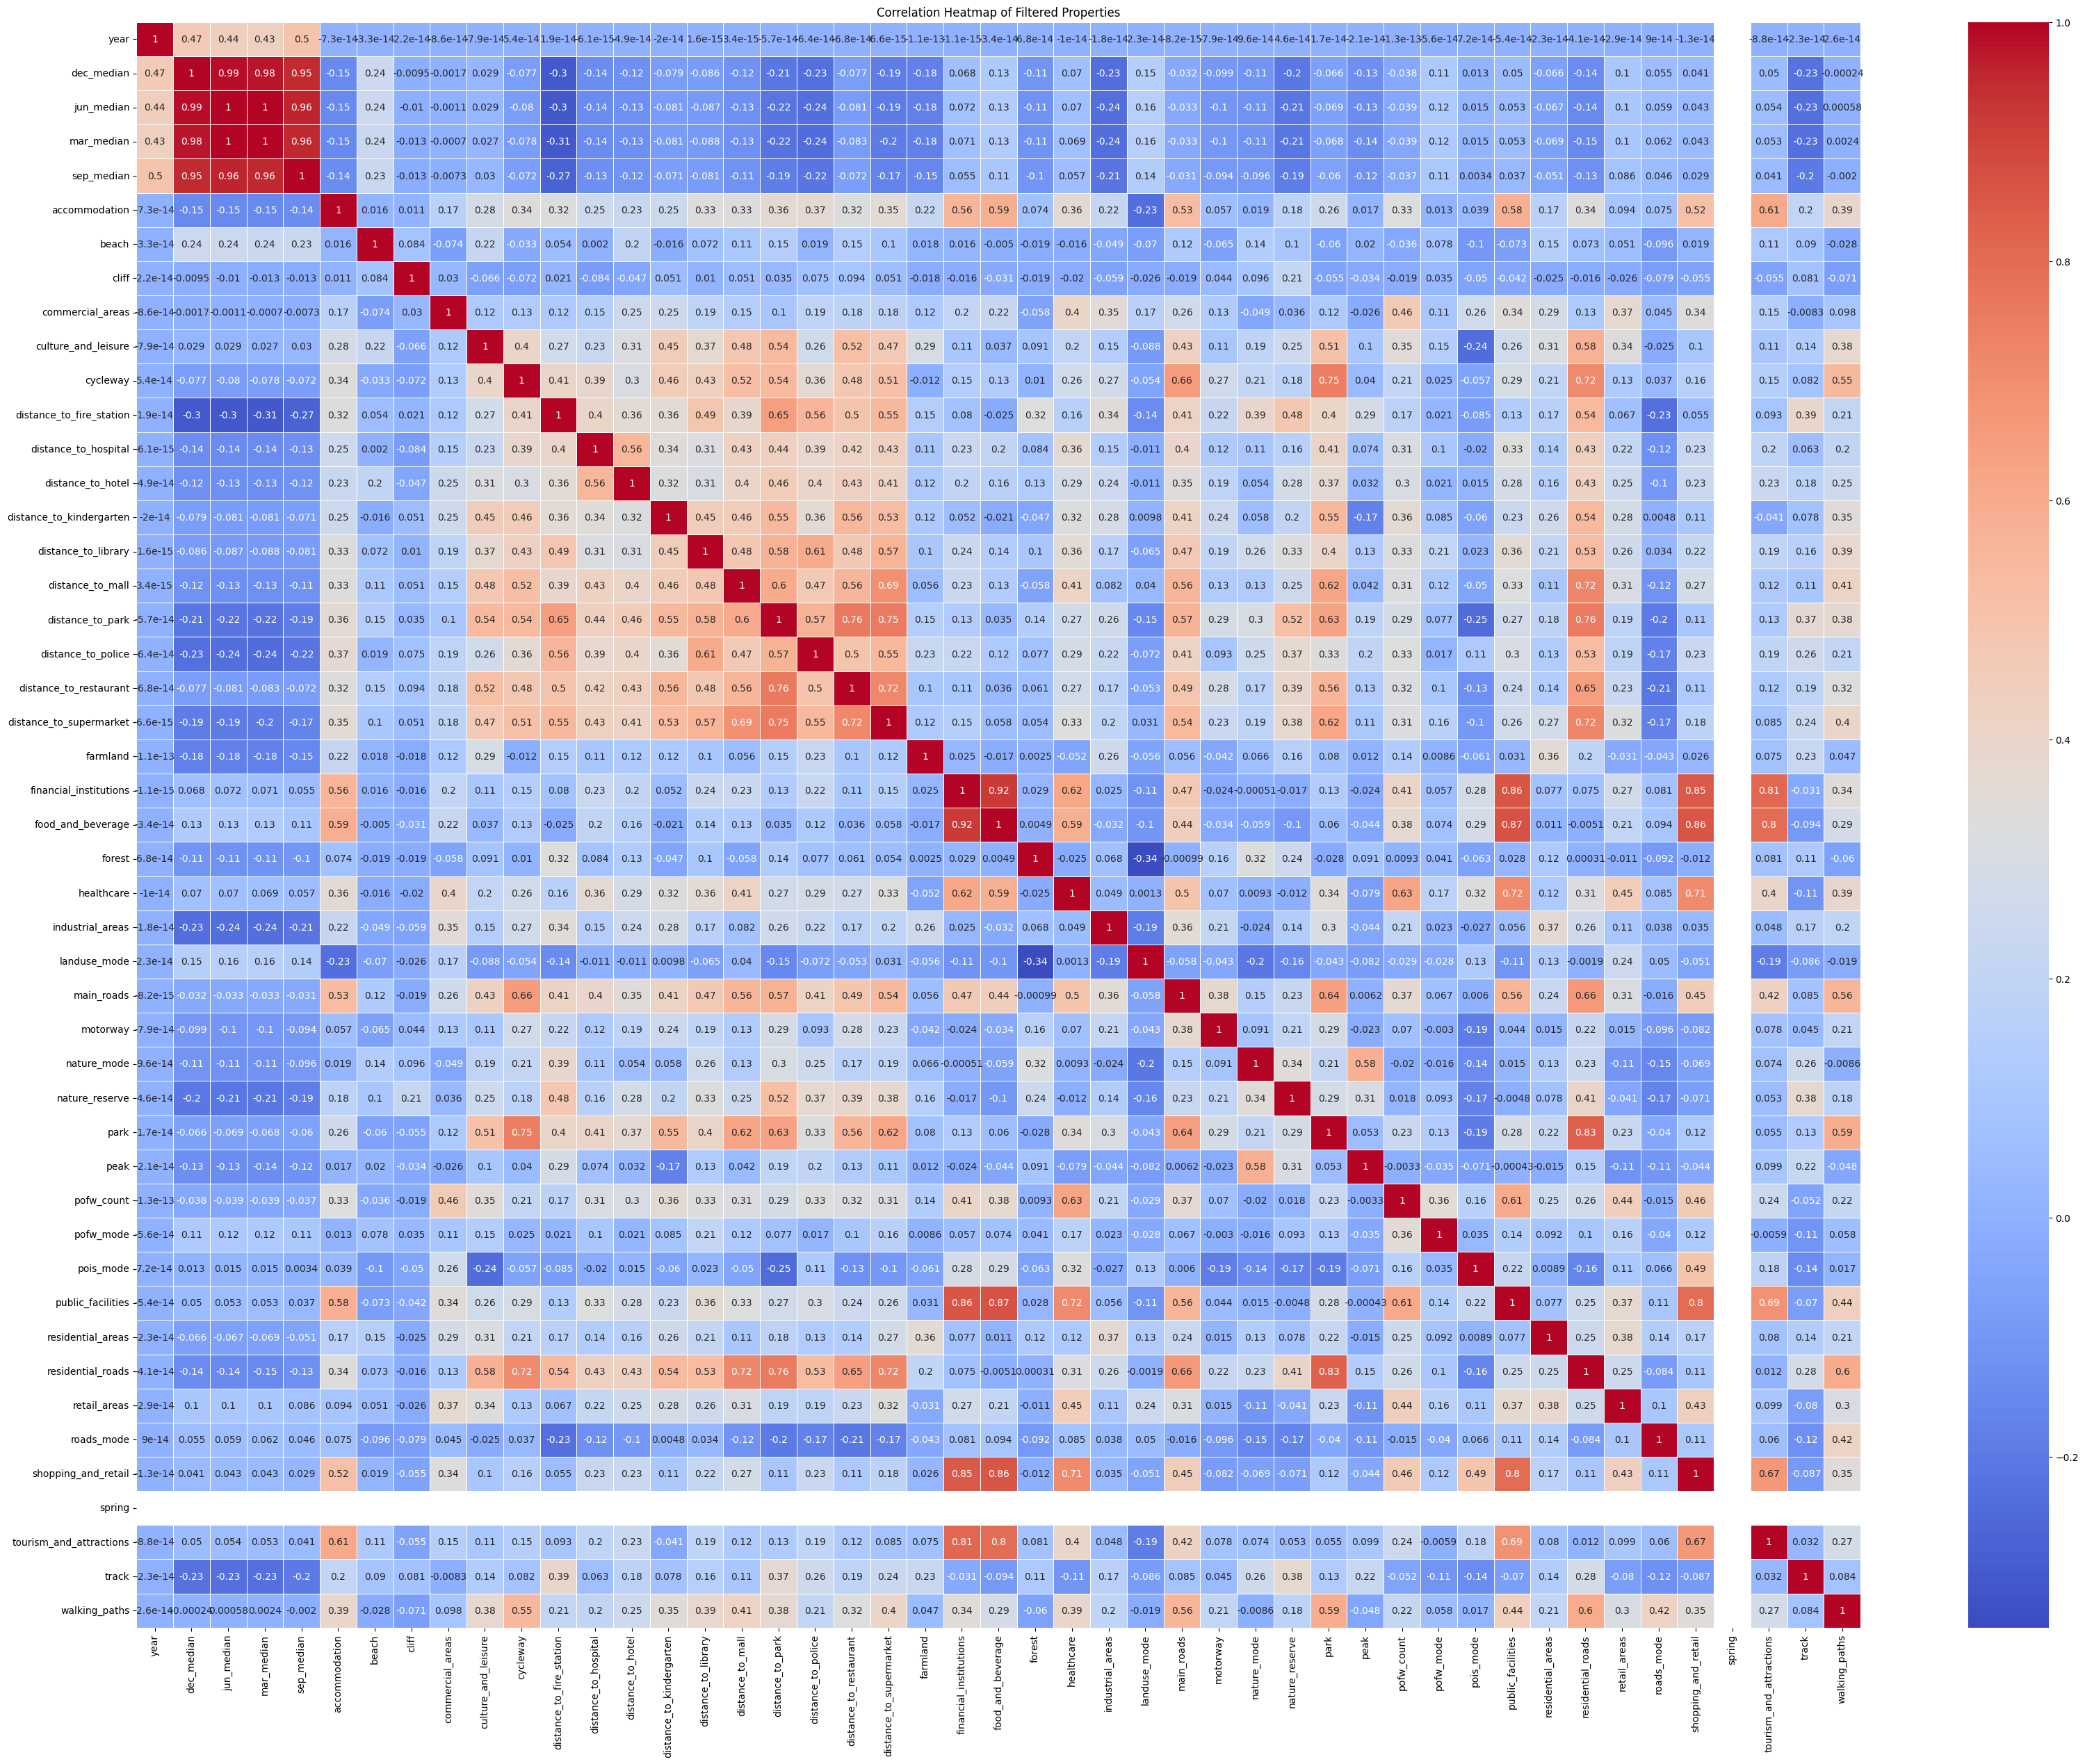

In [157]:
# Step 1: Create a correlation matrix for filtered_all_properties
correlation_matrix = filtered_all_properties.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(40, 30))  # Adjust the size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Filtered Properties')

# Show the plot
plt.show()
